Biblioteki potrzebne do wykonania zadania.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

Klasa Punkt:

In [2]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def print_point(self):
    print(f"x= {self.x} y= {self.y}")

Klasa Linia:

In [3]:
class Line:
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def print_line(self):
    if self.b == 0:
      print(f"Równanie linii: y= {round(self.a,3)} * x")
    elif self.b < 0:
       print(f"Równanie linii: y= {round(self.a,3)} * x {self.b}")
    else:
      print(f"Równanie linii: y= {round(self.a,3)} * x + {self.b}")

Klasa Trójkąt - posiadająca 3 wierzchołki.

In [4]:
class Triangle:
  def __init__(self, point1, point2, point3):
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3

  def print_triangle(self):
        plt.plot([self.point1.x, self.point2.x], [self.point1.y, self.point2.y], color='blue')
        plt.plot([self.point2.x, self.point3.x], [self.point2.y, self.point3.y], color='blue')
        plt.plot([self.point3.x, self.point1.x], [self.point3.y, self.point1.y], color='blue')

        plt.scatter(self.point1.x, self.point1.y, color='red', label='Point 1')
        plt.scatter(self.point2.x, self.point2.y, color='red', label='Point 2')
        plt.scatter(self.point3.x, self.point3.y, color='red', label='Point 3')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Triangle')
        plt.legend()
        plt.grid(True)
        plt.show()

Dodanie nowego punktu poprzez funkcje zewnętrzną dla podanych wartości przez użytkownika.

In [5]:
def create_point_from_user_input():
  x = float(input("Podaj współrzędną x punktu: "))
  y = float(input("Podaj współrzędną y punktu: "))

  return Point(x, y)

Dodanie nowej linii poprzez funkcje zewnętrzną dla podanych wartości przez użytkownika.

In [6]:
def create_line_from_user_input():
  a = float(input("Podaj wartość współczynnika kierunkowego a: "))
  b = float(input("Podaj wartość wyrazu wolnego b:  "))

  return Line(a, b)

Funkcja zwracająca równanie linii w postaci kierunkowej, do której należą dwa punkty.

In [7]:
def create_line(point1, point2):
  a = (point1.y - point2.y) / (point1.x - point2.x)
  b = point1.y - (a * point1.x)

  return Line(a, b)

Funkcja rysująca linie dla podanych punktów korzystająca z biblioteki "matplotlib".

In [8]:
def plot_line(point1, point2):
    plt.plot([point1.x, point2.x], [point1.y, point2.y], '-')
    plt.xlabel('Współrzędna X')
    plt.ylabel('Współrzędna Y')
    plt.title('Równanie linii')
    plt.show()

Funkcja sprawdzająca przynależność punktu do prostej.

In [9]:
def lineage_affiliation(point, line):
  if(point.y == ((line.a * point.x) + line.b)):
    return True
  else:
    return False


Funkcja zwracająca po której stronie prostej jest nasz punkt

In [10]:
def which_side(point, line):
  result = point.y - (line.a * point.x + line.b)

  if result > 0:
      print("Punkt leży po lewej stronie prostej")
  elif result < 0:
      print("Punkt leży po prawej stronie prostej")
  else:
      print("Punkt leży na prostej")

Funkcja wyświetlająca linie i punkt.

In [11]:
def show_lineage_affiliatio(point, line):
  x_values = np.array([point.x-5, point.x+5])
  y_values = line.a * x_values + line.b

  plt.plot(x_values, y_values, '-')
  plt.scatter(point.x, point.y, color='red', label='Punkt', marker='x')
  plt.xlabel('Współrzędna X')
  plt.ylabel('Współrzędna Y')
  plt.title('Przynależność punktu do linii')
  plt.legend()
  plt.show()

Funkcja wyświetlająca odcinek i punkt, który sprawdzamy, czy nalezy do punktu

In [12]:
def plot_line_segment(point_start, point_end, ptr):
    plt.scatter(ptr.x, ptr.y, color='red', label='Punkt', marker='x')
    plt.plot([point_start.x, point_end.x], [point_start.y, point_end.y], marker='o')
    plt.xlabel('Współrzędna X')
    plt.ylabel('Współrzędna Y')
    plt.title('Rysowanie odcinka')
    plt.legend()
    plt.show()

Sprawdzenie przynależności punktu do linii (odcinka).

In [13]:
def point_in_line_segment(point, segment_start, segment_end):
    #Czy współrzędne punktu są pomiędzy współrzędnymi punktów odcinka
    x_min = min(segment_start.x, segment_end.x)
    x_max = max(segment_start.x, segment_end.x)
    y_min = min(segment_start.y, segment_end.y)
    y_max = max(segment_start.y, segment_end.y)

    if x_min <= point.x <= x_max and y_min <= point.y <= y_max:
        #Orientację punktu względem odcinka
        orientation = (point.x - segment_start.x) * (segment_end.y - segment_start.y) - (point.y - segment_start.y) * (segment_end.x - segment_start.x)
        # Ze wzoru: (y-y1)(x2-x1)-(y2-y1)(x-x1)=0

        if orientation == 0:
            print("Punkt leży na odcinku")
        elif orientation < 0:
            print("Punkt leży po lewej stronie odcinka")
        elif orientation > 0:
            print("Punkt leży po prawej stronie odcinka")
        else:
            print("Punkt nie leży na odcinku")
    else:
        print("Punkt nie leży na odcinku")

Funkcja, która dokonuje translacji linii o podany wektor. Można też zrobić korzystając ze współczynnika kierunkowego i wyrazu wolnego ze wzoru  y = a(x-c) + d + d, gdzie:
c to przesunięcie w kierunku OX,

d to przesunięcie w kierunku OY.
co daje nam nową linie Line2 = Line(a, b+d-a*c), wtedy do funkcji musimy przekazać jedynie wektor i zwrócić Line2, która nadpisze poprzednią.

In [14]:
#Translacja o wektor
def translate(pkt_line_start, pkt_line_end, vector):
  pkt_line_start.x += vector.x
  pkt_line_start.y += vector.y

  pkt_line_end.x += vector.x
  pkt_line_end.y += vector.y

  return create_line(pkt_line_start, pkt_line_end)

Funkcja, która dokonuje odbicia danego punktu względem linii. dbicie punktu(x,y) względem prostej o równaniu y=mx+b można uzyskać za pomocą wzorów:

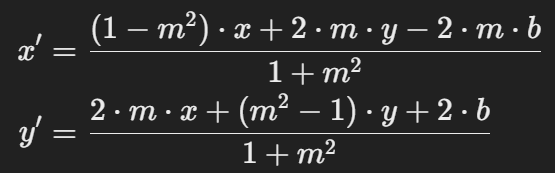

In [15]:
def reflect_point(point, line):
    m = line.a  # współczynnik kierunkowy prostej

    x_prime = ((1 - m**2) * point.x + 2 * m * point.y - 2 * m * line.b) / (1 + m**2)
    y_prime = (2 * m * point.x + (m**2 - 1) * point.y + 2 * line.b) / (1 + m**2)

    reflected_point = Point(x_prime, y_prime)
    return reflected_point

Funkcja wypisująca punkty - pierwotny i odbity oraz linię względem, której to robiono.

In [16]:
def show(point, point2, line):
  x_values = np.array([point.x-5, point.x+5])
  y_values = line.a * x_values + line.b

  plt.plot(x_values, y_values, '-')
  plt.scatter(point.x, point.y, color='red', label='Punkt pierwotny', marker='x')
  plt.scatter(point2.x, point2.y, color='blue', label='Punkt odbity', marker='o')
  plt.xlabel('Współrzędna X')
  plt.ylabel('Współrzędna Y')
  plt.title('Odbicie punktu wzgledem linii')
  plt.legend()
  plt.show()

Funkcja służąca do obliczania punktu przecięcia dwóch prostych na podstawie współczynników równania w postaci ogólnej

In [17]:
def intersectionPoint(line1, line2):
    x = (line1.b - line2.b) / (line2.a - line1.a)
    y = line1.a * x + line1.b
    point1 = Point(x, y)
    point1.print_point()

    # Wykres
    x_vals = np.linspace(-10, 10, 100)
    y_vals1 = line1.a * x_vals + line1.b
    y_vals2 = line2.a * x_vals + line2.b

    plt.plot(x_vals, y_vals1, label='Linia 1')
    plt.plot(x_vals, y_vals2, label='Linia 2')
    plt.scatter(x, y, color='red', label='Punkt przecięcia')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Wykres przecięcia dwóch linii')
    plt.legend()
    plt.grid(True)
    plt.show()

Funkcja służąca do obliczania punktu przecięcia dwóch prostych na podstawie dwóch linii o znanym początku i końcu (punkt przecięcia prostych
przechodzących przez te linie)

In [18]:
def intersectionPoint2(line_1, line_2):
    #Obliczanie punktu przeciecia
    x=(line_1.b-line_2.b)/(line_2.a-line_1.a)
    y=line_1.a*x+line_1.b
    point1 = Point(x,y)

    # Wykres
    x_vals = np.linspace(-10, 10, 100)
    y_vals1 = line_1.a * x_vals + line_1.b
    y_vals2 = line_2.a * x_vals + line_2.b

    plt.plot(x_vals, y_vals1, label='Linia 1')
    plt.plot(x_vals, y_vals2, label='Linia 2')
    plt.scatter(x, y, color='red', label='Punkt przecięcia')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Wykres przecięcia dwóch linii')
    plt.legend()
    plt.grid(True)
    plt.show()


Oblicznie odległości punktu od prostej + rysunek:

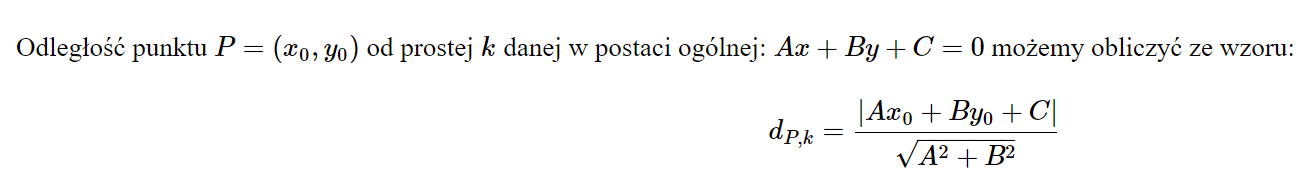

In [19]:
def distanceFromTheLine(line, point1):
  distance = (abs(line.a* point1.x + 1 * point1.y + line.b))/(math.sqrt(line.a**2+1))
  print(f"Odległość między punktem, a prosta wynosi {distance}")

  # Wykres
  x_vals = np.linspace(-10, 10, 100)
  y_vals = line.a * x_vals + line.b

  plt.plot(x_vals, y_vals, label='Linia')
  plt.scatter(point1.x, point1.y, color='red', label='Punkt')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Wykres odległości punktu od linii')
  plt.legend()
  plt.grid(True)
  plt.show()

Funkcja znajdująca punkt przecięcia się dwóch prostych

In [20]:
def pointFromTwoLines(line1, line2):
    x = (line1.b-line2.b)/(line2.a-line1.a)
    y = line1.a * x+line1.b
    point=Point(x,y)

    return point

Program główny - menu

Menu Lab_02_03:
1. Wyznaczenie równania prostej, do której należy dana linia.
2. Sprawdzenie przynależności punktu do prostej.
3. Sprawdzenie przynależności punktu do linii (odcinka).
4. Określenie położenia punktu względem prostej (prawo/lewo).
5. Dokonanie translacji linii o podany wektor.
6. Dokonanie odbicia danego punktu względem linii.
7. Obliczanie punktu przecięcia dwóch prostych na podstawie współczynników równania w postaci ogólnej.
8. Obliczanie punktu przecięcia dwóch prostych na podstawie dwóch linii o znanym początku i końcu.
9. Zmierzenie odległości między punktem a linią.
10. Obiekt trójkąt ograniczony trzema prostymi.
Wybierz opcje: 8
Pierwsza prosta
Podaj współrzędną x punktu: 0
Podaj współrzędną y punktu: 1
Podaj współrzędną x punktu: 0.4
Podaj współrzędną y punktu: -0.2
Druga prosta
Podaj współrzędną x punktu: 0
Podaj współrzędną y punktu: -1
Podaj współrzędną x punktu: 0.6
Podaj współrzędną y punktu: 0.8


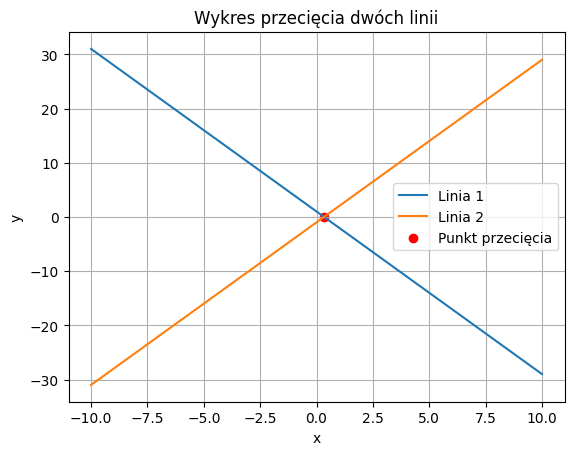

In [21]:
def main():
  print("Menu Lab_02_03:")
  print("1. Wyznaczenie równania prostej, do której należy dana linia.")
  print("2. Sprawdzenie przynależności punktu do prostej.")
  print("3. Sprawdzenie przynależności punktu do linii (odcinka).")
  print("4. Określenie położenia punktu względem prostej (prawo/lewo).")
  print("5. Dokonanie translacji linii o podany wektor.")
  print("6. Dokonanie odbicia danego punktu względem linii.")
  print("7. Obliczanie punktu przecięcia dwóch prostych na podstawie współczynników równania w postaci ogólnej.")
  print("8. Obliczanie punktu przecięcia dwóch prostych na podstawie dwóch linii o znanym początku i końcu.")
  print("9. Zmierzenie odległości między punktem a linią.")
  print("10. Obiekt trójkąt ograniczony trzema prostymi.")

  option = input("Wybierz opcje: ")
  if option == "1":
    point_a = create_point_from_user_input()
    point_b = create_point_from_user_input()

    line_1 = create_line(point_a, point_b)
    line_1.print_line()

    plot_line(point_a, point_b)

  elif option == "2":
    point = create_point_from_user_input()
    line = create_line_from_user_input()

    if(lineage_affiliation(point, line)):
      print("Punkt nalezy do linii :>")
    else:
      print("Punkt nie należy do linii :<")

    show_lineage_affiliatio(point, line)
  elif option == "3":
    #Aby sprawdzić, czy punkt należy do odcinka linii musimy mieć dwa punkty,
    #które ograniczają linie

    print("Dla odcinka:")
    point_start = create_point_from_user_input()
    point_end = create_point_from_user_input()

    print("Punkt dla którego sprawdzamy, czy należy na odcinku")
    ptr = create_point_from_user_input()

    point_in_line_segment(ptr, point_start, point_end)
    plot_line_segment(point_start, point_end, ptr)

  elif option == "4":
    point = create_point_from_user_input()
    line = create_line_from_user_input()

    which_side(point, line)
    show_lineage_affiliatio(point, line)
  elif option == "5":
    #Tworzenie linii
    point_start = create_point_from_user_input()
    point_end = create_point_from_user_input()
    line = create_line(point_start, point_end)

    print("Linia przed translacja.")
    line.print_line()
    plot_line(point_start, point_end)

    print("Wsporzedne wektora na podstawie, ktorego wykonujemy translacje")
    ptr = create_point_from_user_input()

    #Translacja
    line = translate(point_start, point_end, ptr)

    print("Linia po translacji.")
    line.print_line()
    plot_line(point_start, point_end)

  elif option == "6":
    print("Linia względem którem dokonujemy odbicia")
    line = create_line_from_user_input()

    print("Punkt, który odbijamy")
    ptr = create_point_from_user_input()
    ptr2 = reflect_point(ptr, line)

    show(ptr, ptr2, line)
  elif option == "7":
    line1 = create_line_from_user_input()
    line2 = create_line_from_user_input()

    intersectionPoint(line1, line2)
  elif option == "8":
    print("Pierwsza prosta")
    point_a = create_point_from_user_input()
    point_b = create_point_from_user_input()
    line_1 = create_line(point_a, point_b)

    print("Druga prosta")
    point_a2 = create_point_from_user_input()
    point_b2 = create_point_from_user_input()
    line_2 = create_line(point_a2, point_b2)

    intersectionPoint2(line_1, line_2)
  elif option == "9":
    point = create_point_from_user_input()
    line1 = create_line_from_user_input()

    distanceFromTheLine(line1, point)
  elif option == "10":
    line1 = create_line_from_user_input()
    line2 = create_line_from_user_input()
    line3 = create_line_from_user_input()

    point1 = pointFromTwoLines(line1, line2)
    point2 = pointFromTwoLines(line2, line3)
    point3 = pointFromTwoLines(line3, line1)

    triangle = Triangle(point1, point2, point3)
    triangle.print_triangle()
  else:
    print("Nieprawiodłowy wybór :<")


if __name__ == "__main__":
    main()